<a href="https://colab.research.google.com/github/polina-minaeva/advanced-optimization/blob/main/%D0%94%D0%97%20%22%D0%9F%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D0%B0%D1%8F%20%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

In [ ]:
import numpy as np #Загрузила библиотеки
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def ackley(x): #Задала функцию через def
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)] #Задала границы генерации начальных значений

result = differential_evolution(ackley, bounds, seed=42) #Использовала метод дифференциальной эволюции, который находит глобальный минимум функции
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

**Построила график количества итераций от значений параметра strategy**

In [ ]:
#Нашла все значения количества итераций будущего графика по strategy

s1 = differential_evolution(ackley, bounds, seed=42)

s2 = differential_evolution(ackley, bounds, strategy='best1exp', seed=42)

s3 = differential_evolution(ackley, bounds, strategy='rand1exp', seed=42)

s4 = differential_evolution(ackley, bounds, strategy='randtobest1exp', seed=42)

s5 = differential_evolution(ackley, bounds, strategy='currenttobest1exp', seed=42)

all_strategy_nit = [s1['nit'], s2['nit'], s3['nit'], s4['nit'], s5['nit']] #Все значения количества итераций сформировала в список

In [ ]:
#Загрузила пандас для создания датафрейма для хранения данных

import pandas as pd

data1 = [['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp'], all_strategy_nit]

df1 = pd.DataFrame(data1).T
df2 = df1.pivot_table(index=[0], values=[1], sort=False)

<Axes: title={'center': 'График количества итераций от значений параметра strategy'}, xlabel='Тип параметра', ylabel='Количество итераций'>

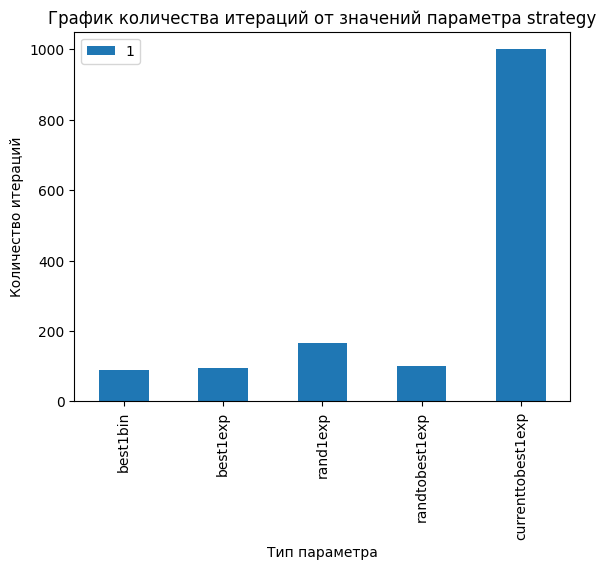

In [ ]:
#Визуализировала датафрейм с помощью столбчатой диаграммы

df2.plot(kind='bar',
                  title='График количества итераций от значений параметра strategy',
                  xlabel='Тип параметра strategy',
                  ylabel='Количество итераций')

Наибольшее количество итераций потребовалось при strategy='currenttobest1exp'. Наименьшее – при strategy='best1bin'

**Построила график количества итераций от значений параметра popsize**

In [ ]:
#Нашла все значения будущего графика по popsize (действия по аналогии с предыдущим графиком)

popsizes = [20, 70, 120, 170, 220]

p1 = differential_evolution(ackley, bounds, popsize=20, seed=42)

p2 = differential_evolution(ackley, bounds, popsize=70, seed=42)

p3 = differential_evolution(ackley, bounds, popsize=120, seed=42)

p4 = differential_evolution(ackley, bounds, popsize=170, seed=42)

p5 = differential_evolution(ackley, bounds, popsize=220, seed=42)

all_popsize_nit = [p1['nit'], p2['nit'], p3['nit'], p4['nit'], p5['nit']]

In [ ]:
x = popsizes #Обозначила данные как x и y
y = all_popsize_nit

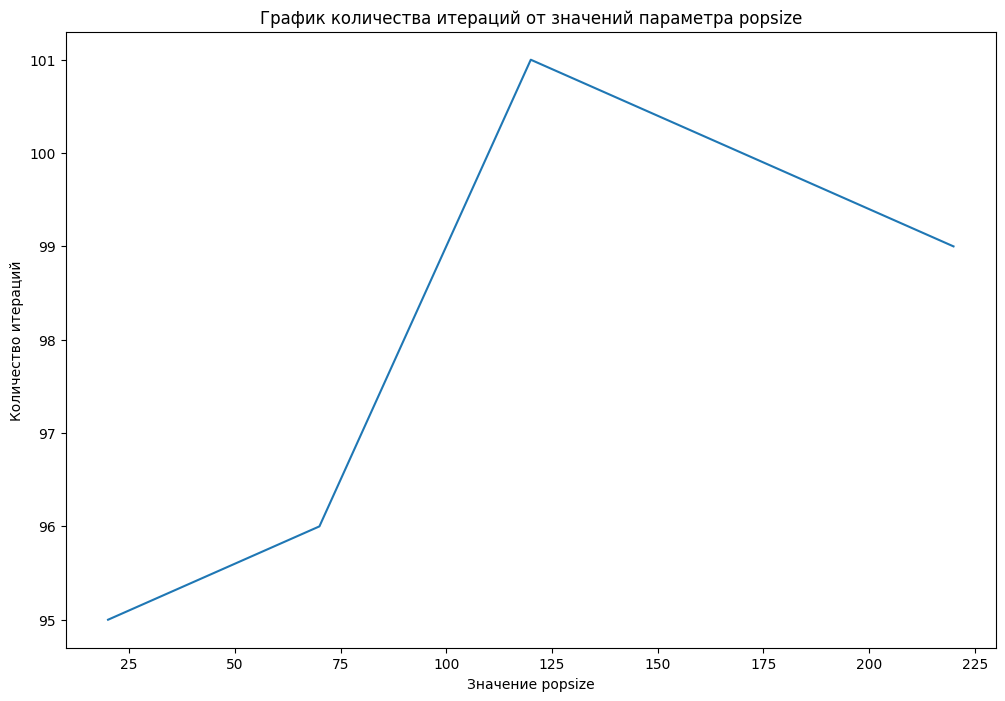

In [ ]:
plt.figure(figsize=(12, 8)) #Визуализировала график
plt.plot(x, y)
plt.xlabel('Значение popsize')
plt.ylabel('Количество итераций')
plt.title('График количества итераций от значений параметра popsize')
plt.show()

График (а следовательно и количество итераций) возрастает примерно до значения popsize=125. Далее он вновь убывает.

**Построила график количества итераций от значений параметра mutation**

In [ ]:
#Нашла все значения будущего графика по mutation

mutations = [0.3, 0.4, 0.5, 0.6, 0.7]

m1 = differential_evolution(ackley, bounds, mutation=0.3, seed=42)

m2 = differential_evolution(ackley, bounds, mutation=0.4, seed=42)

m3 = differential_evolution(ackley, bounds, mutation=0.5, seed=42)

m4 = differential_evolution(ackley, bounds, mutation=0.6, seed=42)

m5 = differential_evolution(ackley, bounds, mutation=0.7, seed=42)

all_mutation_nit = [m1['nit'], m2['nit'], m3['nit'], m4['nit'], m5['nit']]

In [ ]:
x2 = mutations
y2 = all_mutation_nit

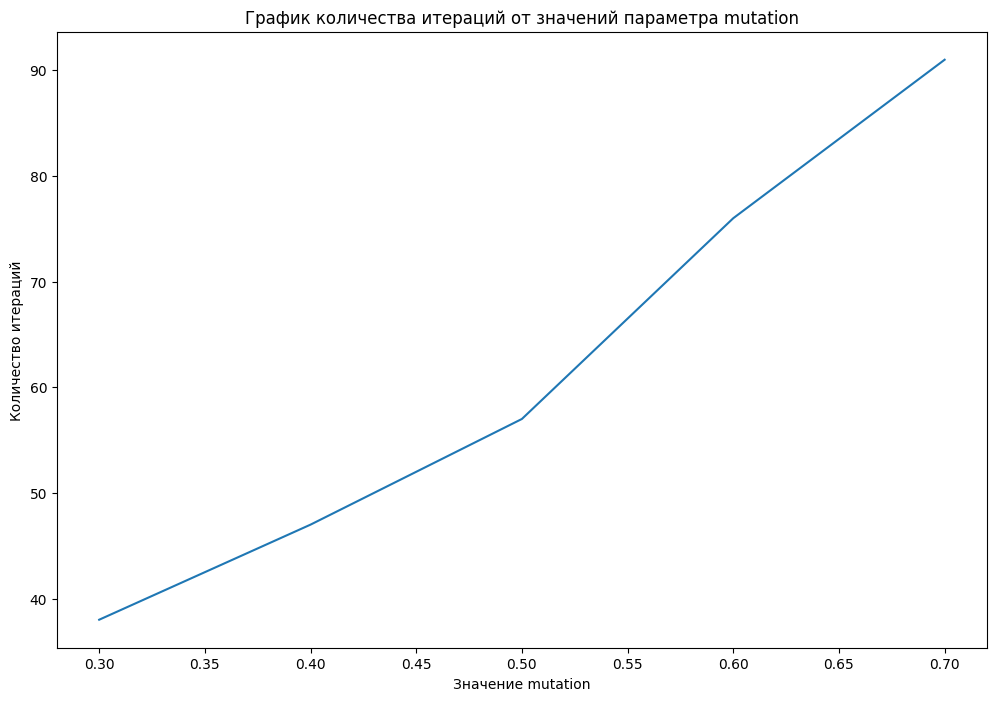

In [ ]:
plt.figure(figsize=(12, 8)) #Визуализировала график
plt.plot(x2, y2)
plt.xlabel('Значение mutation')
plt.ylabel('Количество итераций')
plt.title('График количества итераций от значений параметра mutation')
plt.show()

График возрастает, то есть количество итераций растет, когда увеличивается значение mutation